### Imports

In [8]:
%load_ext autoreload
%autoreload 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\src")

from perceptron import Perceptron

### Data preparation

In [10]:
df = pd.read_csv("../../db/wine/winequality-red.csv", delimiter=";")

X = df[['volatile acidity', 'density']].values.reshape(-1,2)
Y = df['quality']

### Learn

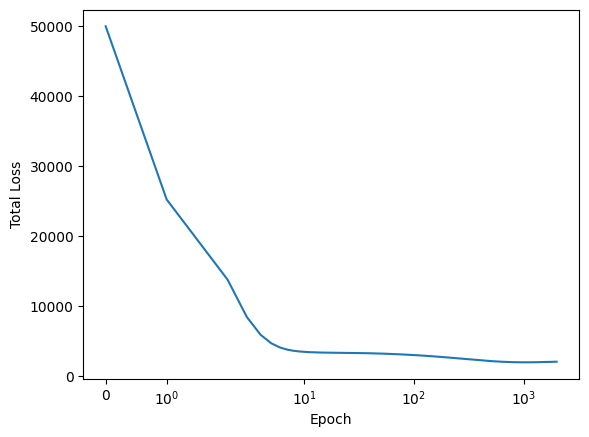

In [11]:
p = Perceptron(in_size=X.ndim)
costs = p.learn(X, Y)

plt.xscale('symlog')
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.plot(costs[:, 0], costs[:, 1])

### Prepare model data point for visualization

In [12]:
x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(x.min(), x.max(), 50)
y_pred = np.linspace(y.min(), y.max(), 50)

xy = np.empty((x_pred.size + y_pred.size,), dtype=x_pred.dtype)
xy[0::2] = x_pred
xy[1::2] = y_pred
xy = xy.reshape(50, 2)

predicted = p.predict(xy)
predicted = np.expand_dims(predicted, axis=1)

### Plot

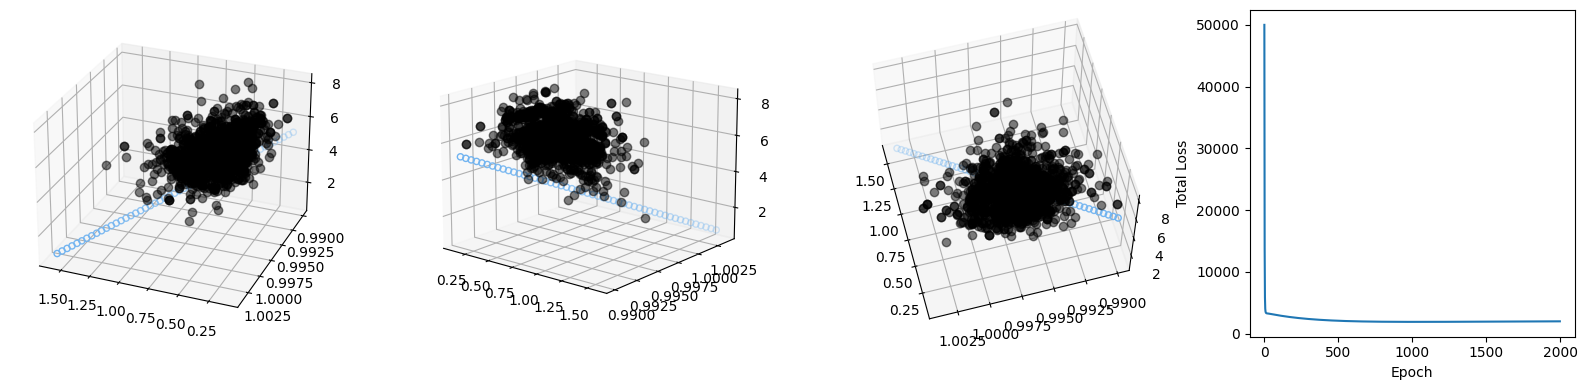

In [13]:
plt.style.use('default')

fig = plt.figure(figsize=(16, 4))

ax1 = fig.add_subplot(141, projection='3d')
ax2 = fig.add_subplot(142, projection='3d')
ax3 = fig.add_subplot(143, projection='3d')
ax4 = fig.add_subplot(144)
                      
axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(x_pred, y_pred, predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

ax4.plot(costs[:, 0], costs[:, 1])
ax4.set(xlabel='Epoch', ylabel='Total Loss')

fig.tight_layout()